
### Climate Change and Sea Ice Extent

We want to answer the question: Has there been a decrease in the amount of ice in the last years?

For that we will use the sea ice extent measurements (in millions of square km) from the [National Snow & Ice Data Center](https://nsidc.org).

We perform the following processing steps:
1. Read and clean the data.
2. Normalize the Sea Ice Extent (SIE) data and visualize its temporal trend.
3. Compute the SIE temporal trend as a simple linear regression (OLS) and quantitatively evaluate it.
4. Estimate the sea ice extent for 2025.


### 1. Read and clean the data.
Load the monthly sea ice extent (SIE) monthly data provided in the file 'SeaIce.txt'. Note variables ``extent`` (SIE) and ``area`` should be greater or equal than zero. Detect possible outliers and clean the data.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#your solution here
df = pd.read_csv("SeaIce.txt", sep="\s+") #We can use the regular expression \s+ to match any number of spaces as the file doesnt have a fixed structure
print(f"The DataFrame has {len(df)} items.")
df.head(5)

The DataFrame has 424 items.


,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.54,12.33
1,1980,1,Goddard,N,14.96,11.85
2,1981,1,Goddard,N,15.03,11.82
3,1982,1,Goddard,N,15.26,12.11
4,1983,1,Goddard,N,15.10,11.92


In [3]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,mo,extent,area
year,1.000000,-0.023981,0.056609,0.057043
mo,-0.023981,1.000000,-0.002868,-0.002849
extent,0.056609,-0.002868,1.000000,1.000000
area,0.057043,-0.002849,1.000000,1.000000


In [4]:
cuac = df.year.apply(str) + "-" + df.mo.apply(str)

In [5]:
pd.DatetimeIndex(pd.to_datetime(cuac, yearfirst = True)).strftime("%Y-%m")

Index(['1979-01', '1980-01', '1981-01', '1982-01', '1983-01', '1984-01',
       '1985-01', '1986-01', '1987-01', '1988-01',
       ...
       '2004-12', '2005-12', '2006-12', '2007-12', '2008-12', '2009-12',
       '2010-12', '2011-12', '2012-12', '2013-12'],
      dtype='object', length=424)

In [6]:
df2 = df.copy()
df2.index = pd.DatetimeIndex(pd.to_datetime(cuac, yearfirst = True)).strftime("%Y-%m")
df2.head()

,year,mo,data_type,region,extent,area
1979-01,1979,1,Goddard,N,15.54,12.33
1980-01,1980,1,Goddard,N,14.96,11.85
1981-01,1981,1,Goddard,N,15.03,11.82
1982-01,1982,1,Goddard,N,15.26,12.11
1983-01,1983,1,Goddard,N,15.10,11.92


In [7]:
df2_s = df2.sort_index()
df2_s.head()

,year,mo,data_type,region,extent,area
1978-11,1978,11,Goddard,N,12.01,8.97
1978-12,1978,12,Goddard,N,14.12,10.85
1979-01,1979,1,Goddard,N,15.54,12.33
1979-02,1979,2,Goddard,N,16.31,13.11
1979-03,1979,3,Goddard,N,16.45,13.13


In [8]:
df2_s.isna().sum()

year         0
mo           0
data_type    0
region       0
extent       0
area         0
dtype: int64

In [9]:
df3 = df2_s[(df2_s["extent"] >= 0) | (df2_s["area"] >= 0)]
print(f"We have detected and deleted {len(df2_s) - len(df3)} incorrect entries.\nActual entries: {len(df3)}.")
df3.head()

We have detected and deleted 2 incorrect entries.
Actual entries: 422.


,year,mo,data_type,region,extent,area
1978-11,1978,11,Goddard,N,12.01,8.97
1978-12,1978,12,Goddard,N,14.12,10.85
1979-01,1979,1,Goddard,N,15.54,12.33
1979-02,1979,2,Goddard,N,16.31,13.11
1979-03,1979,3,Goddard,N,16.45,13.13


### 2. Normalize the SIE data and visualize its temporal trend.

Visualize there is a monthly dependence of SIE, explore the linear relationship using ``lmplot``.
Compute the mean and variance of SIE for each month.

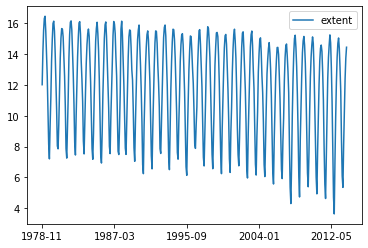

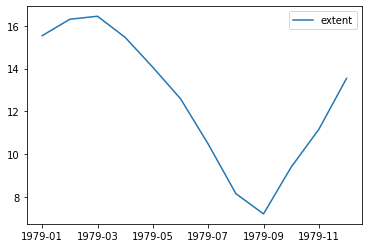

In [10]:
#your response here
df3.plot(y = "extent")

df3.loc["1979-01":"1979-12"].plot(y = "extent")

plt.show()

In [11]:
cuac = df3.groupby(["mo"]).std()
cuac["mo"] = np.arange(1,13)

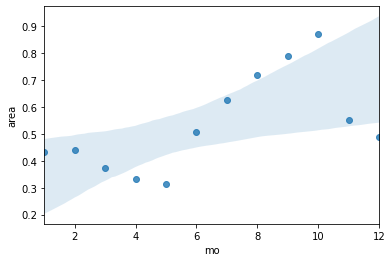

In [29]:
sns.lmplot(x="mo", y="area", data = cuac, height=5.2, aspect=2)
plt.show()

By using the ```.groupby()``` method we can group the DataFrame by month and calculate its mean and variance with the ```.mean()`` `and ```.var()``` methods. 

*If we wanted to, we could compute the standard deviation as well by using the ```.std()``` method.*

In [14]:
m_mean = df3.groupby(["mo"]).mean()
m_mean

,year,extent,area
mo,,,
1,1996.742857,14.479429,12.118571
2,1996.500000,15.298889,12.920833
3,1996.000000,15.491714,13.076857
4,1996.000000,14.766000,12.426286
5,1996.000000,13.396000,11.013714
6,1996.000000,11.860000,9.015143
7,1996.000000,9.601143,6.237714
8,1996.000000,7.122286,4.530571
9,1996.000000,6.404857,4.246286


In [15]:
m_var = df3.groupby(["mo"]).var()
m_var

,year,extent,area
mo,,,
1,112.078992,0.304906,0.187330
2,111.000000,0.295804,0.193191
3,105.000000,0.237209,0.140269
4,105.000000,0.215378,0.109648
5,105.000000,0.189901,0.097942
6,105.000000,0.247918,0.255561
7,105.000000,0.679175,0.393130
8,105.000000,0.824577,0.515723
9,105.000000,1.143902,0.622165


Normalize the SIE data: subtract the monthly mean and then convert to percent difference by dividing by the 1981-2013 average and then multiplying by 100.

In [16]:
#your response here
df3_norm = df3.copy()
df3_norm.head()

,year,mo,data_type,region,extent,area
1978-11,1978,11,Goddard,N,12.01,8.97
1978-12,1978,12,Goddard,N,14.12,10.85
1979-01,1979,1,Goddard,N,15.54,12.33
1979-02,1979,2,Goddard,N,16.31,13.11
1979-03,1979,3,Goddard,N,16.45,13.13


In [17]:
m_mean

,year,extent,area
mo,,,
1,1996.742857,14.479429,12.118571
2,1996.500000,15.298889,12.920833
3,1996.000000,15.491714,13.076857
4,1996.000000,14.766000,12.426286
5,1996.000000,13.396000,11.013714
6,1996.000000,11.860000,9.015143
7,1996.000000,9.601143,6.237714
8,1996.000000,7.122286,4.530571
9,1996.000000,6.404857,4.246286


In [16]:
df3_norm.head(5)

,year,mo,data_type,region,extent,area
1978-11,1978,11,Goddard,N,12.01,8.97
1978-12,1978,12,Goddard,N,14.12,10.85
1979-01,1979,1,Goddard,N,15.54,12.33
1979-02,1979,2,Goddard,N,16.31,13.11
1979-03,1979,3,Goddard,N,16.45,13.13


In [17]:
df3_norm.tail()

,year,mo,data_type,region,extent,area
2013-10,2013,10,NRTSI-G,N,8.10,5.54
2013-11,2013,11,NRTSI-G,N,10.24,8.26
2013-12,2013,12,NRTSI-G,N,12.38,10.48
2014-01,2014,1,NRTSI-G,N,13.73,11.66
2014-02,2014,2,NRTSI-G,N,14.44,12.12


In [18]:
mean_81_13 = df3.mean(axis = 0)["extent"]
mean_81_13

11.777582938388624

In [19]:
df3["extent"].mean()

11.777582938388624

In [21]:
df3_norm["extent"] = df3_norm[["mo", "extent"]].apply(lambda x: x.extent - m_mean.loc[x.mo]["extent"], axis = 1)
df3_norm.head()

,year,mo,data_type,region,extent,area
1978-11,1978,11,Goddard,N,1.045278,8.97
1978-12,1978,12,Goddard,N,1.060571,10.85
1979-01,1979,1,Goddard,N,1.060571,12.33
1979-02,1979,2,Goddard,N,1.011111,13.11
1979-03,1979,3,Goddard,N,0.958286,13.13


In [22]:
df3_norm["area"].apply(lambda x: (x / mean_81_13) * 100)

1978-11     76.161637
1978-12     92.124166
1979-01    104.690411
1979-02    111.313162
1979-03    111.482976
              ...    
2013-10     47.038514
2013-11     70.133236
2013-12     88.982604
2014-01     99.001638
2014-02    102.907363
Name: area, Length: 422, dtype: float64

Visualize the trend of SIE per year considering:1) all months, 2) January, 3) August

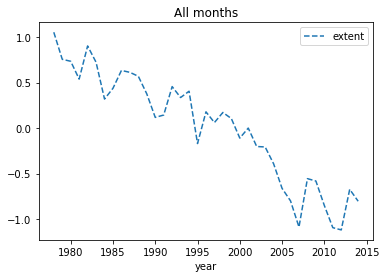

In [25]:
df3_norm.groupby(by = "year").mean().plot(y="extent", style = '--')
plt.title("All months")
plt.show()

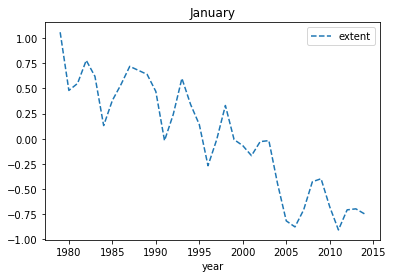

In [26]:
df3_norm[df3_norm["mo"] == 1].groupby(by = "year").mean().plot(y = "extent", style = "--")
plt.title("January")
plt.show()

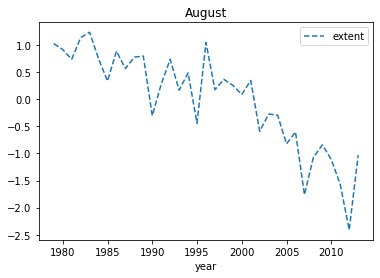

In [27]:
df3_norm[df3_norm["mo"] == 8].groupby(by = "year").mean().plot(y = "extent", style = "--")
plt.title("August")
plt.show()

In [25]:
#your response here

Calculate the Pearson correlation coefficient and the p-value for testing non-correlation of the SIE temporal trend (consider all months). Is it significant?

In [26]:
#your response here

### 3. Compute the trend as a simple linear regression (OLS) and quantitatively evaluate it.

Provide the estimated parameters for the linear regression. 
Evaluate the quality of fit quantitatively and graphically.

In [27]:
#your solution here

### 4. Estimate the sea ice extent for 2025

 Is there a negative trend in the evolution of sea ice extent over recent years? 

In [28]:
#your solution here